# Introduction

In this kernel I will go through......<br>
<br>
This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

# Data preparation

## Import libraries

In [2]:
# Data engineering.
import pandas as pd
import numpy as np

# Regular expressions module.
#import re

# Data visualization and frame's visualization options.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")

## Load data files

In [3]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

## Quick view at dataset

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [6]:
train_df.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  \
0   0  130.81   k  v  at  a  d  u  j  o    0    0    0    1    0    0    0   
1   6   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0   
2   7   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    0   
3   9   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0   
4  13   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0   

   X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  \
0    0    1    0    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    1    0    0    0    0    0    0    0    1    0    0    0    1    0   
2    1    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
3    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
4    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   

   X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  \
0    0    0    1    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    0    1    0    1    0    0    0    0    0    0    0    0    0    0   
2    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   
3    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   
4    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   

   X48  X49  X50  ...   X335  X336  X337  X338  X339  X340  X341  X342  X343  \
0    0    0    0  ...      0     0     0     0     0     0     0     0     0   
1    0    0    0  ...      0     1     1     0     0     0     0     0     0   
2    0    0    0  ...      0     0     0     0     0     0     0     0     0   
3    0    0    0  ...      0     0     0     0     0     0     0     0     0   
4    0    0    0  ...      0     0     0     0     0     0     0     0     0   

   X344  X345  X346  X347  X348  X349  X350  X351  X352  X353  X354  X355  \
0     0     0     0     0     0     0     0     0     0     0     1     0   
1     0     0     0     0     1     0     0     0     0     0     0     0   
2     0     0     0     0     1     0     1     0     0     0     1     0   
3     0     0     0     0     1     0     1     0     0     0     0     0   
4     0     0     0     0     1     0     1     0     0     0     0     0   

   X356  X357  X358  X359  X360  X361  X362  X363  X364  X365  X366  X367  \
0     0     0     0     0     0     1     0     0     0     0     0     0   
1     0     0     0     0     0     1     0     1     0     0     0     0   
2     0     0     1     0     0     1     0     1     0     0     0     0   
3     0     0     1     0     0     1     0     1     0     0     0     0   
4     0     0     1     0     0     1     0     1     0     0     0     0   

   X368  X369  X370  X371  X372  X373  X374  X375  X376  X377  X378  X379  \
0     0     0     0     0     0     0     0     0     0     1     0     0   
1     0     0     0     0     0     0     0     1     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     1     0     0     0     0     0     0     0   
4     0     0     0     1     0     0     0     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

## Features

checking cardinality, nie biore pod uwage ID oraz target variable

In [7]:
from collections import OrderedDict
counts = {'Constant': OrderedDict(), 'Binary': OrderedDict(), 'Categorical': OrderedDict()}


for feat in [x for x in train_df.columns if 'X' in x]:    
    typ = train_df[feat].dtype
    uniq = len(np.unique(train_df[feat]))
    
    if uniq == 1:
        counts['Constant'][feat] = uniq 
    elif uniq == 2 and typ == np.int64:
        counts['Binary'][feat] = uniq
    else:
        counts['Categorical'][feat] = uniq

In [8]:
print('Constant features:', len(counts['Constant'].keys()))
print('Binary features:', len(counts['Binary'].keys()))
print('Categorical features:', len(counts['Categorical'].keys()))

Constant features: 12
Binary features: 356
Categorical features: 8


we have 12 features which only have a single value in them - these are pretty useless for supervised algorithms

## Target feature

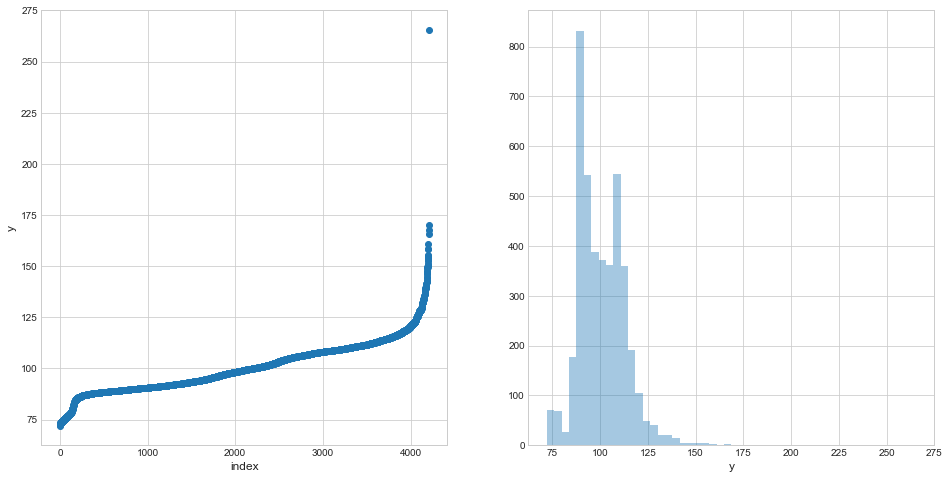

In [9]:
val = np.sort(train_df.y.values)

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.scatter(range(train_df.shape[0]), val)
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)

plt.subplot(122)
sns.distplot(val, bins=50, kde=False)
plt.xlabel('y', fontsize=12)

plt.show()

## Cleaning

- handling outliers and missing values

In [10]:
train_df = train_df[train_df['y'] < 200]

# Data exploration

## Factor levels distribution

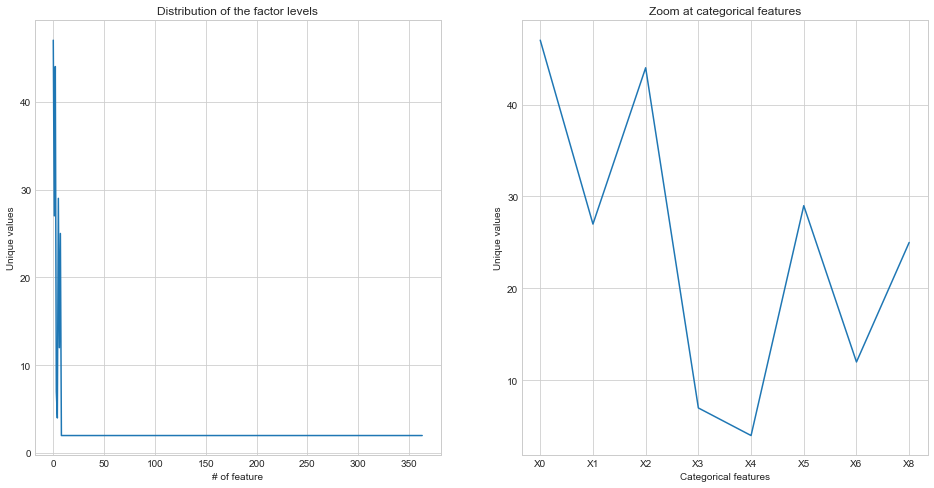

In [11]:
x = np.array(list(counts['Categorical'].values()) + list(counts['Binary'].values()))

fig = plt.figure(figsize=(16,8))

no1 = fig.add_subplot(121)
no1.plot(x)
no1.set_title('Distribution of the factor levels')
plt.xlabel('# of feature')
plt.ylabel('Unique values')


no2 = fig.add_subplot(122)
no2.plot(x[:8])
no2_labels = no2.get_xticks().tolist()
no2_labels[1:-1] = list(counts['Categorical'].keys())
no2.set_xticklabels(no2_labels)
no2.set_title('Zoom at categorical features')
plt.xlabel('Categorical features')
plt.ylabel('Unique values')


plt.show()

In [12]:
counts['Categorical']

OrderedDict([('X0', 47),
             ('X1', 27),
             ('X2', 44),
             ('X3', 7),
             ('X4', 4),
             ('X5', 29),
             ('X6', 12),
             ('X8', 25)])

## Features insight

- removing 0 variation features

In [13]:
counts['Constant'].keys()

odict_keys(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'])

In [14]:
test_df.drop(counts['Constant'].keys(), 1, inplace=True)
train_df.drop(counts['Constant'].keys(), 1, inplace=True)

## Binary features relations

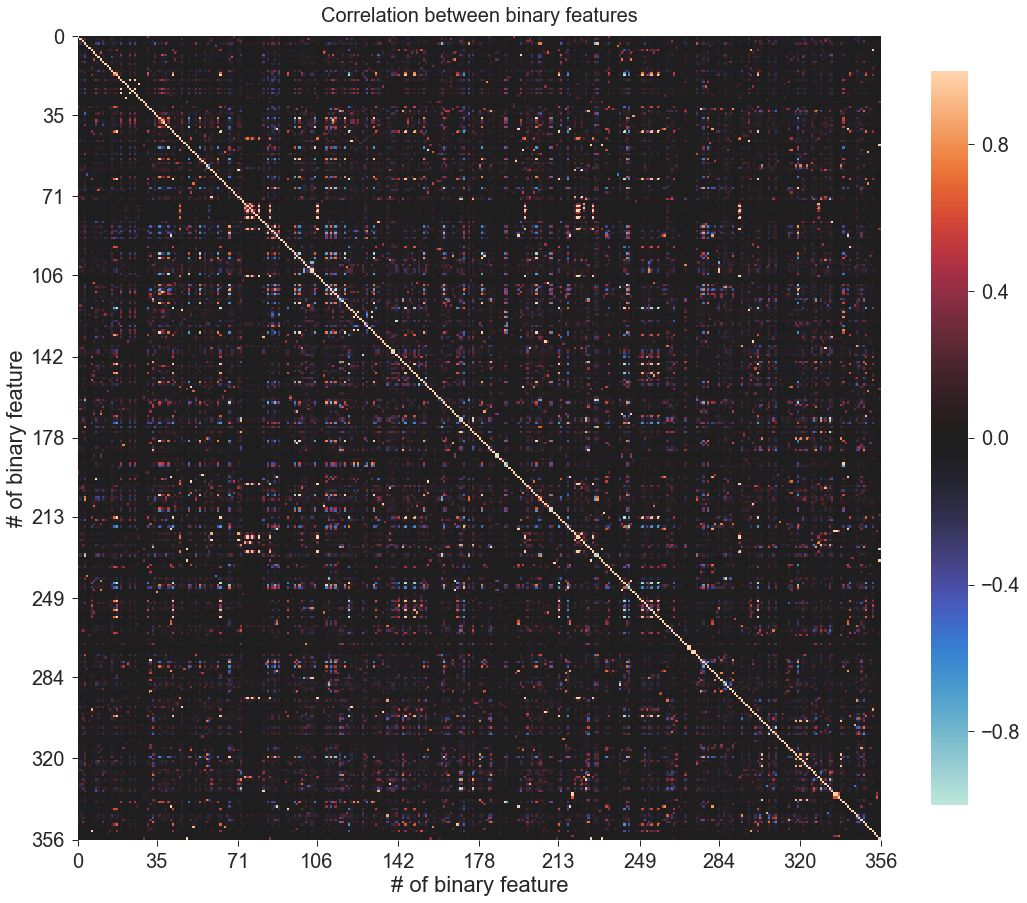

In [15]:
binary_df = train_df[list(counts['Binary'].keys())]
binary_corr_df = binary_df.corr()

rcstyle = {'axes.linewidth': 1.0, 'axes.edgecolor': 'black','ytick.minor.size': 5.0}
sns.set(font_scale=2.0)
sns.set_style('ticks', rcstyle)

plt.figure(figsize=(18,18))
plt.title('Correlation between binary features', y=1.01, size=20)

ax = sns.heatmap(binary_corr_df, vmin=-1, vmax=1, center=0, 
                 square=True, cbar_kws={"shrink": .75})

plt.xticks(rotation=0)
ax.set_xlabel('# of binary feature')
ax.set_xticks(np.linspace(0, binary_df.shape[1], 11, dtype=int))
ax.set_xticklabels(np.linspace(0.0, binary_df.shape[1], 11, dtype=int))

ax.set_ylabel('# of binary feature')
ax.set_yticks(np.linspace(0, binary_df.shape[1], 11, dtype=int))
ax.set_yticklabels(np.linspace(0.0, binary_df.shape[1], 11, dtype=int))

plt.show()

In [16]:
i, j = np.where(binary_corr_df.values > 0.9)

high_corr_df = pd.DataFrame({'corr': binary_corr_df.values[[i, j]], 'ind1': i, 'ind2': j, 'var1': binary_corr_df.columns[i], 'var2': binary_corr_df.columns[j]})
high_corr_df = high_corr_df[high_corr_df['ind1'] != high_corr_df['ind2']]

ind_val = high_corr_df[['ind1', 'ind2']].values
sort_val = []
for i in ind_val:
    sort_val.append(sorted(i))
    
q, w = np.unique(sort_val, axis=0, return_index=True)

high_corr_df = high_corr_df.iloc[w].sort_index()

In [17]:
high_corr_df.head(10)

corr  ind1  ind2 var1  var2
4   0.932199     3   230  X14  X251
8   1.000000     6   352  X17  X382
11  0.994679     8   196  X19  X215
21  0.994274    17    42  X29   X54
22  0.994274    17    63  X29   X76
23  0.961902    17   145  X29  X162
24  1.000000    17   213  X29  X232
25  0.931650    17   250  X29  X272
26  0.943835    17   254  X29  X276
27  1.000000    17   257  X29  X279

## Categorical features relations

- implicit ordering of the categorical features
- http://www.statisticshowto.com/nominal-variable/
- https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
- https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix/39266194#39266194
- https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792

# Categorical features

## Train vs test feature levels

In [18]:
cat_feat_diff = OrderedDict()
cat_feat_uniq = OrderedDict()

for i in list(counts['Categorical'].keys()):
    
    uniq_train = train_df[i].unique()
    print('Feature {} in train_df dataset has {} unique values. Here is a full list:\n{}'.format(i, len(uniq_train), uniq_train))
    
    uniq_test = test_df[i].unique()
    print('Feature {} in test_df dataset has {} unique values. Here is a full list:\n{}\n'.format(i, len(uniq_test), uniq_test))
    
    x = [x for x in uniq_train if x not in uniq_test]
    y = [x for x in uniq_test if x not in uniq_train]
    
    cat_feat_uniq[i] = np.unique([*uniq_train, *uniq_test]).tolist()
    cat_feat_diff[i] = [x , y]    

Feature X0 in train_df dataset has 47 unique values. Here is a full list:
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
Feature X0 in test_df dataset has 49 unique values. Here is a full list:
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']

Feature X1 in train_df dataset has 27 unique values. Here is a full list:
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
Feature X1 in test_df dataset has 27 unique values. Here is a full list:
['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']

Feature X2 in train_df dataset has 44 u

In [19]:
for i, j in cat_feat_diff.items():
    print('{} feature -  missing factor levels in training set: {} <{}>\
    \n{} feature -  missing factor levels in testing set: {} <{}>\n'.format(i, len(j[1]), j[1], i,  len(j[0]), j[0]))

X0 feature -  missing factor levels in training set: 6 <['av', 'ag', 'an', 'ae', 'p', 'bb']>    
X0 feature -  missing factor levels in testing set: 4 <['q', 'aa', 'ac', 'ab']>

X1 feature -  missing factor levels in training set: 0 <[]>    
X1 feature -  missing factor levels in testing set: 0 <[]>

X2 feature -  missing factor levels in training set: 6 <['aj', 'ax', 'ab', 'w', 'ad', 'u']>    
X2 feature -  missing factor levels in testing set: 5 <['l', 'aa', 'c', 'o', 'ar']>

X3 feature -  missing factor levels in training set: 0 <[]>    
X3 feature -  missing factor levels in testing set: 0 <[]>

X4 feature -  missing factor levels in training set: 0 <[]>    
X4 feature -  missing factor levels in testing set: 0 <[]>

X5 feature -  missing factor levels in training set: 4 <['t', 'b', 'a', 'z']>    
X5 feature -  missing factor levels in testing set: 1 <['u']>

X6 feature -  missing factor levels in training set: 0 <[]>    
X6 feature -  missing factor levels in testing set: 0 <[]>



## Most popular feature levels

In [20]:
# Aggregate values
agg_train = ['count', 'mean', 'std']

col_train = [['train_df']*3, ['count', 'mean', 'std']]
col_test = [('test_df', 'Feature levels'), ('test_df', 'count')]

columns = list(zip(*col_train))

tuple_creator = []

for i, j in list(cat_feat_uniq.items()):
    for factor in j:
        tuple_creator.append( (i, factor) )

# Train data frame
index = pd.MultiIndex.from_tuples(tuple_creator)
columns = pd.MultiIndex.from_tuples(columns)
train_feat = pd.DataFrame(columns=columns, index=index)

# Test data frame
test_feat = pd.DataFrame()

# Top5 feature levels for each categorical feature
count_df = pd.DataFrame()

for i in list(counts['Categorical'].keys()):
    # Preparing train_df data
    x = train_df[[i, 'y']].groupby(i).agg(agg_train).round(1)
    x.columns.set_levels(['train_df'], level=0, inplace=True)
    
    # Update
    train_feat.loc[i].update(x)
    
    # Preparing test_df data
    y = test_df[i].value_counts()
    y.index = pd.MultiIndex.from_product([[i], y.index])
    y = pd.DataFrame(y)
    y.columns = pd.MultiIndex.from_product([['test_df'], y.columns])
    y.rename(columns={i: 'count'}, inplace=True)

    # Update
    test_feat = pd.concat([test_feat, y])
    
    # Train data for top5 feature levels frame
    x = train_feat.loc[i].sort_values(by=[('train_df', 'count')], ascending=False)['train_df']
    x = x.reset_index()[:5].rename(columns={'index': 'Feature levels'})
    x.columns = pd.MultiIndex.from_product([['train_df'], x.columns])
    x.index = pd.MultiIndex.from_product([[i], x.index])
    
    # Test data for top5 feature levels frame
    y = y['test_df']
    y.index = y.index.droplevel(level=0)
    y = y.reset_index()[:5].rename(columns={'index': 'Feature levels'})
    y.columns = pd.MultiIndex.from_product([['test_df'], y.columns])
    y.index = pd.MultiIndex.from_product([[i], y.index])

    # Creating a data frame with top5 feature levels for each feature
    temp = pd.concat([x , y], axis=1)
    count_df = pd.concat([count_df , temp], axis=0)

    
# Merging train and test data frames
merg_df = pd.concat([train_feat, test_feat], axis=1)
merg_df.head(10)

train_df              test_df
         count   mean   std   count
X0 a        21  115.6   7.9    18.0
   aa        2  152.2  25.1     NaN
   ab        1  112.3   NaN     NaN
   ac        1   89.6   NaN     NaN
   ad       14   94.1     8    12.0
   ae      NaN    NaN   NaN     1.0
   af       35  112.8   6.3    34.0
   ag      NaN    NaN   NaN     1.0
   ai       34   95.8  14.2    38.0
   aj      151    104   8.8   162.0

## Feature levels frequency distributions

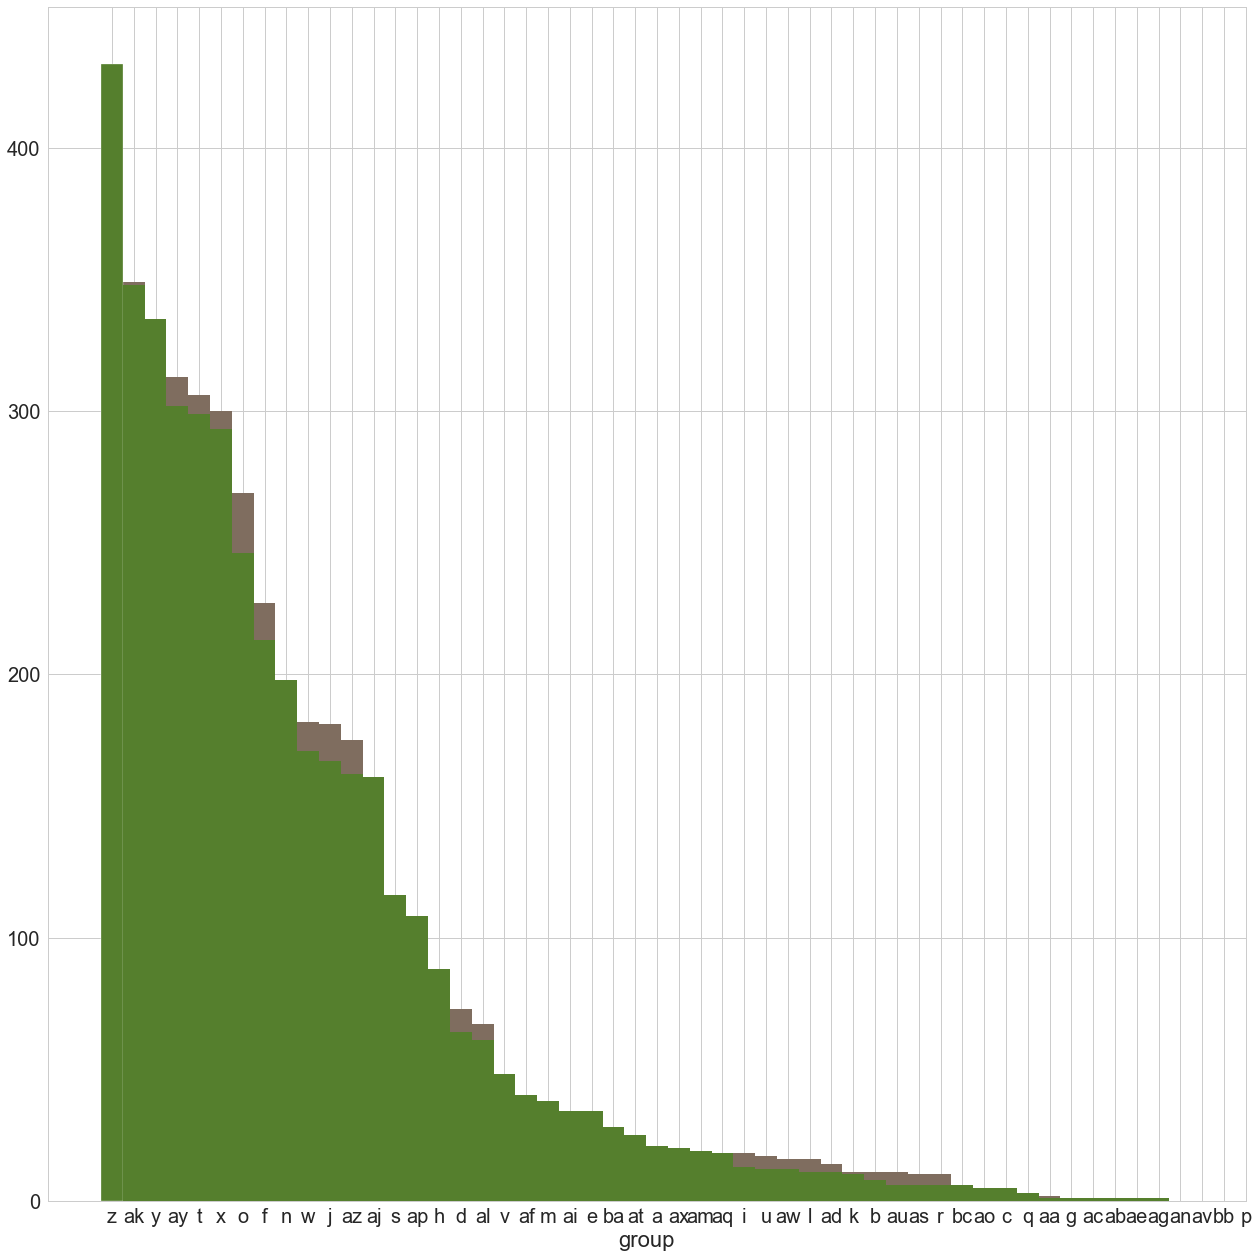

In [343]:
z = merg_df.loc['X0'][('train_df', 'count')].sort_values(ascending=False)
v = merg_df.loc['X0'][('test_df', 'count')].sort_values(ascending=False)
x = len(merg_df['test_df'].index.levels[1])
counter = merg_df['test_df']
y = np.arange(53)

plt.figure(figsize=(18,18))

plt.bar(y, z.values, color='#7f6d5f', edgecolor='white', width=1)
plt.bar(y, v.values, color='#557f2d', edgecolor='white', width=1)
plt.xticks(y, z.index)
plt.xlabel("group")
plt.tight_layout()

plt.show()

## Unique categorical features combinations

In [46]:
train_shape = train_df[list(counts['Categorical'].keys())].shape
test_shape = test_df[list(counts['Categorical'].keys())].shape

train_comb = train_df[list(counts['Categorical'].keys())].drop_duplicates().shape
test_comb = test_df[list(counts['Categorical'].keys())].drop_duplicates().shape

print('{} out of {} training data feature combinations are unique.'.format(train_comb[0], train_shape[0]))
print('{} out of {} testing data feature combinations are unique.'.format(test_comb[0], test_shape[0]))

3865 out of 4208 training data feature combinations are unique.
3868 out of 4209 testing data feature combinations are unique.


# Categorical features relations with target

## Features level reductions

In [250]:
def feat_lvl(feature, limit, limit_type=['lower', 'upper']):
    ''' Returns an array of target values of particular feature in train_df. 
        Limit argument defines occurences limit of feature levels.
    '''
    
    # Takes already made list of counted feature levels
    x = merg_df.loc[feature]['train_df']
    # Slices a feature list by given logistic condition
    if limit_type == 'lower':
        y = x[x['count'] >= limit].index
    else:
        y = x[x['count'] < limit].index
    
    return train_df[['y', feature]].set_index(feature).loc[y].values

freq_feat = np.concatenate(
    [feat_lvl(features, 100, limit_type='lower') for features in list(counts['Categorical'].keys())]
                            ).flatten()
rare_feat = np.concatenate(
    [feat_lvl(features, 100, limit_type='upper') for features in list(counts['Categorical'].keys())]
                            ).flatten()

## TODO - refactorization

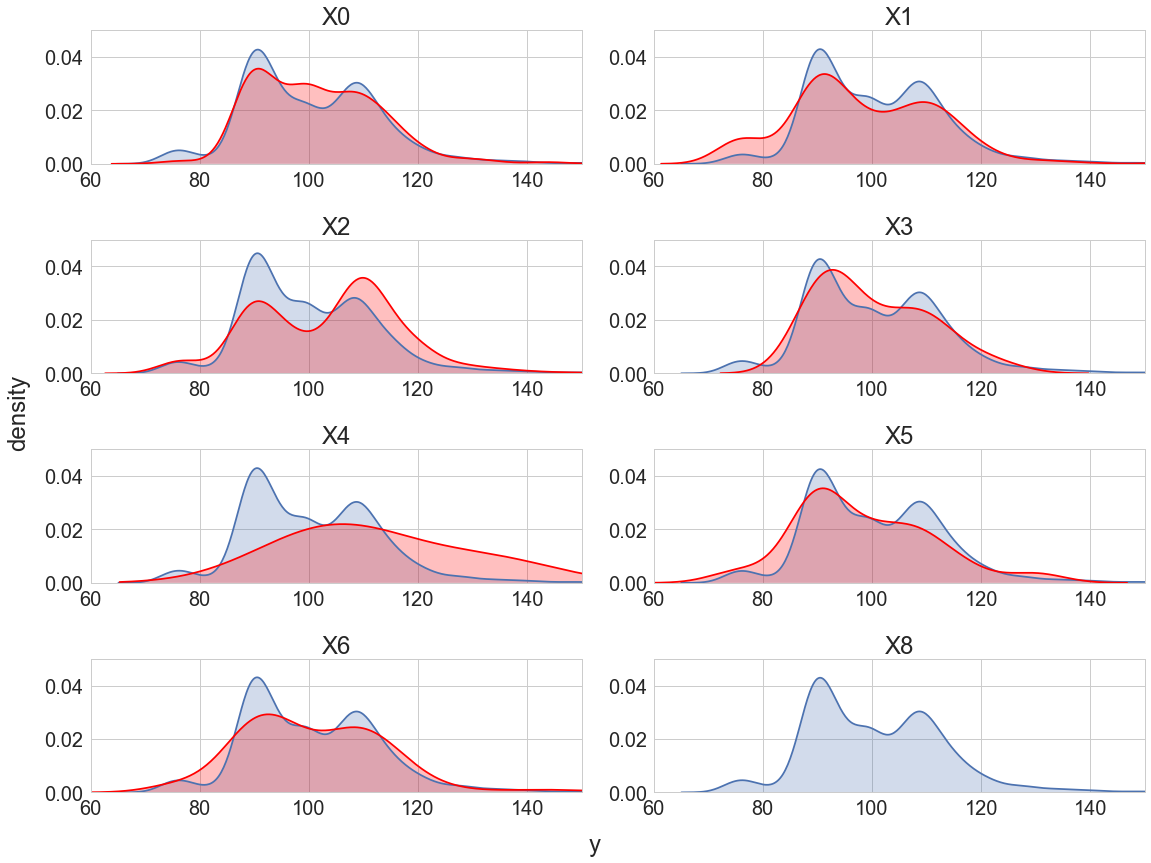

In [251]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(16,12))

subplot_items = [list(counts['Categorical'].keys()), [x for x in range(421,429)]]
subplot_pos = list(zip(*subplot_items))
subplot_pos = dict(subplot_pos)

for feat in list(counts['Categorical'].keys()):
    sub_plot = fig.add_subplot(subplot_pos[feat])
    
    sns.kdeplot(feat_lvl(feat, 100, limit_type='lower').flatten(), shade=True, gridsize=500)
    sns.kdeplot(feat_lvl(feat, 100, limit_type='upper').flatten(), shade=True, color='r', gridsize=500)
    
    sub_plot.set(xlim=(60, 150), ylim=(0, 0.05))
    sub_plot.set_title(feat)

fig.tight_layout()

fig.text(0, 0.5, 'density', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0, 'y', ha='center', va='center')

plt.show()

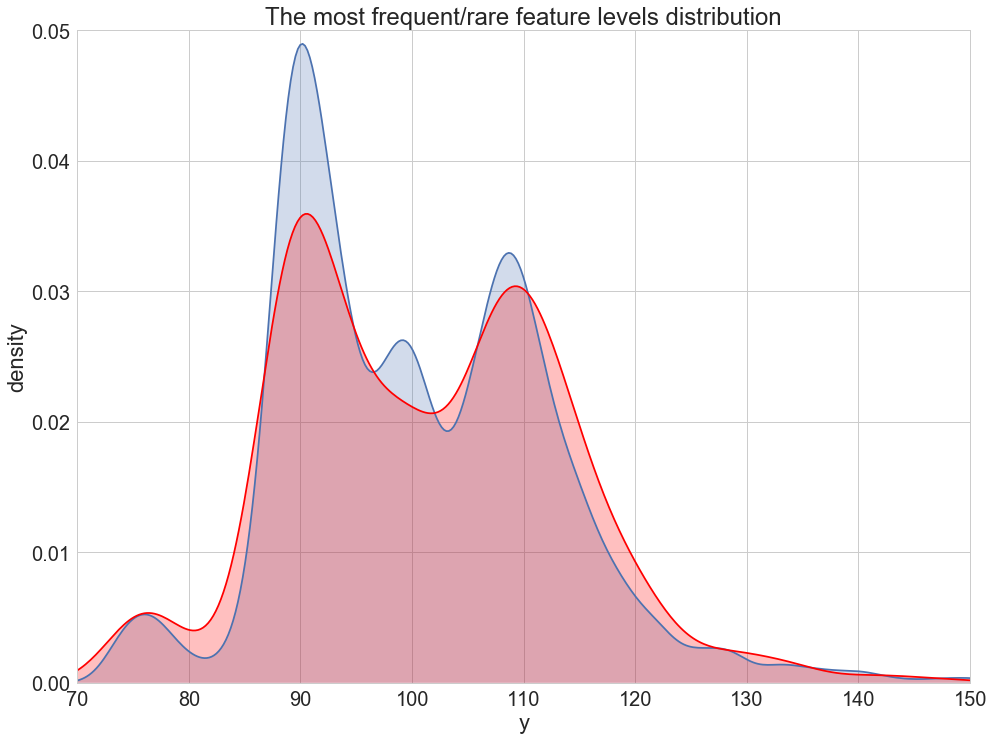

In [254]:
fig, ax = plt.subplots(figsize=(16, 12))

sns.kdeplot(freq_feat, shade=True, gridsize=500)
sns.kdeplot(rare_feat, shade=True, color='r', gridsize=500)

ax.set(xlim=(70, 150), ylim=(0, 0.05))
ax.set_title('The most frequent/rare feature levels distribution')
plt.xlabel('y')
plt.ylabel('density')

plt.show()

## Identifying redundant features

In [257]:
count_df.loc['X4']['train_df']

Feature levels count   mean   std
0              d  4204  100.6  12.4
1              a     2  101.1   6.2
2              b     1  112.8   NaN
3              c     1    134   NaN

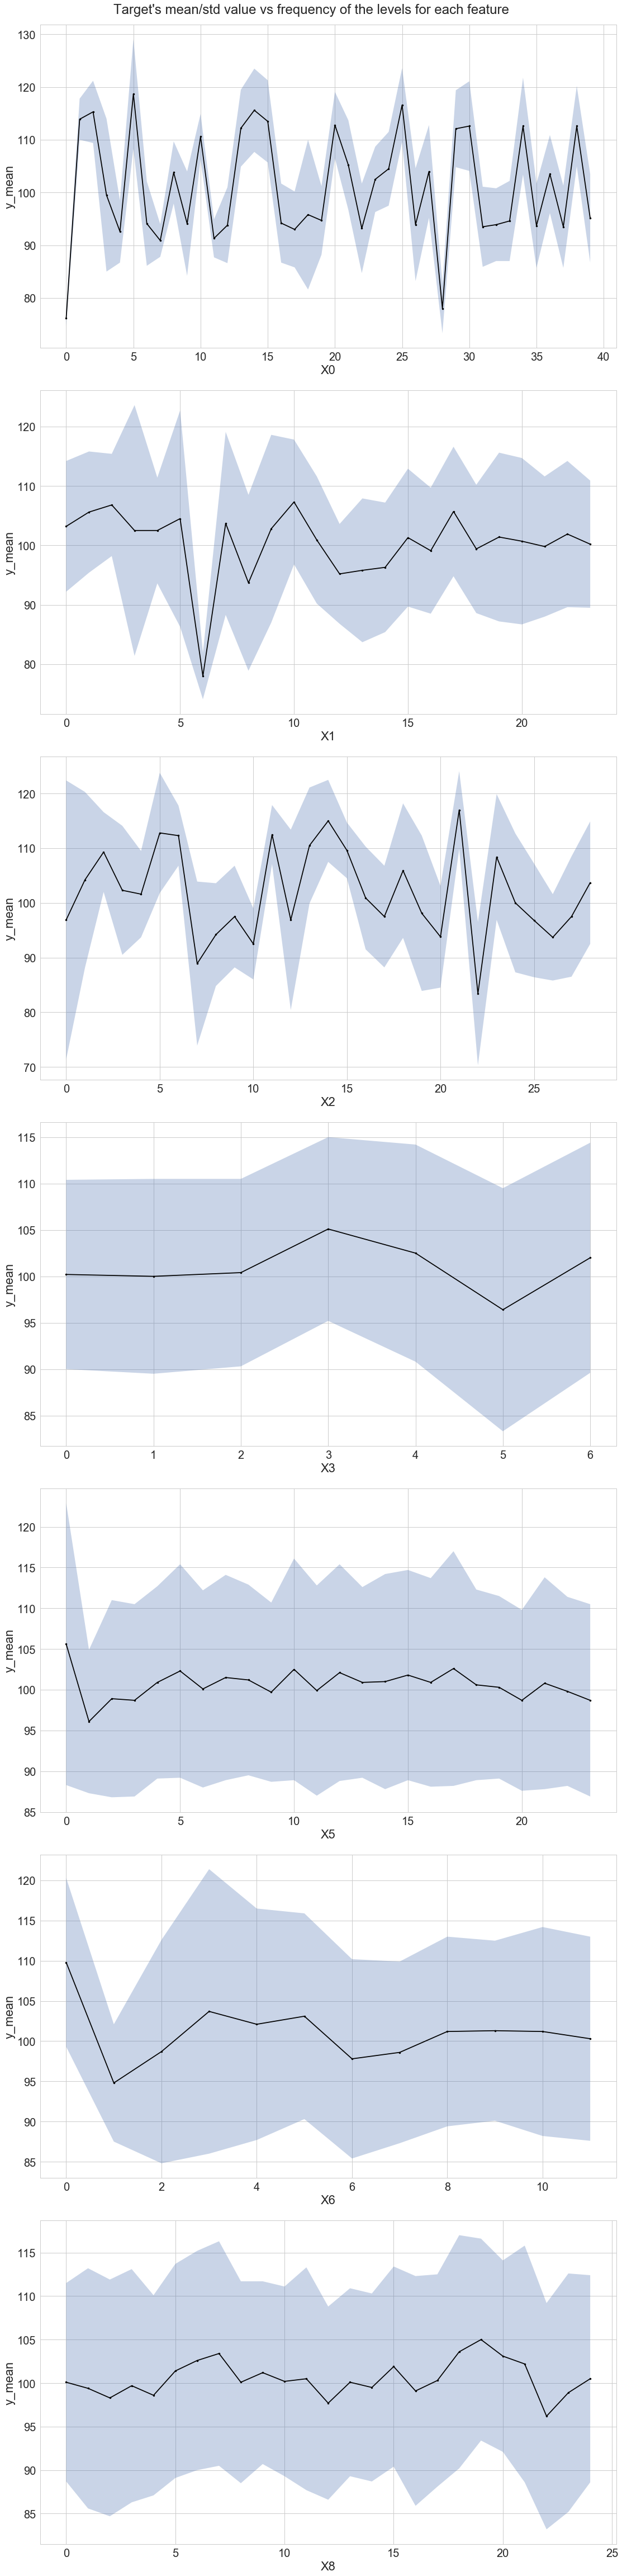

In [341]:
fig = plt.figure(figsize=(16,64))

# TODO function
dict_cat = counts['Categorical']
dict_cat.pop('X4', None)
subplot_items = [list(dict_cat.keys()), [x for x in range(711,718)]]
subplot_pos = list(zip(*subplot_items))
subplot_pos = dict(subplot_pos)


for feat in list(subplot_pos.keys()):
    
    subplot_var = fig.add_subplot(subplot_pos[feat])
    
    y = merg_df.loc[feat]['train_df']
    y = y[y['count'] > 5].sort_values(by='count')
    y = y.apply(pd.to_numeric, errors='ignore')
    
    ymean = y['mean'].values
    ystd = y['std'].values
    std_plus = ymean + ystd
    std_minus = ymean - ystd
    
    subplot_var.fill_between(np.arange(len(y)), std_minus, std_plus, alpha=0.3)
    subplot_var.plot(ymean, color='k', marker='.')
    
    plt.xlabel(feat)
    plt.ylabel('y_mean')

fig.text(0.5, 1, "Target's mean/std value vs frequency of the levels for each feature", 
         ha='center', va='center')
plt.tight_layout()
plt.show()

## X0 and X2 - feature level combinations

In [344]:
count_df.loc[['X0', 'X2']]

train_df                           test_df      
     Feature levels count   mean   std Feature levels count
X0 0              z   360   95.1   8.4             ak   432
   1             ak   349  112.6   7.6              y   348
   2              y   323   93.5   7.8              z   335
   3             ay   313  103.5   7.4              x   302
   4              t   306   93.7     8             ay   299
X2 0             as  1659  103.7  11.2             as  1658
   1             ae   496   97.5    11             ae   478
   2             ai   414   93.7   7.9             ai   462
   3              m   367   96.8  10.4              m   348
   4             ak   265    100  12.7             ak   260

In [374]:
x = train_df[['X0', 'X2']]
y = test_df[['X0', 'X2']]

print('{} out of {} training data X0/X2 combinations are unique.'.format(len(x.drop_duplicates()), len(x)))
print('{} out of {} testing data X0/X2 combinations are unique.'.format(len(y.drop_duplicates()), len(y)))

280 out of 4208 training data X0/X2 combinations are unique.
277 out of 4209 testing data X0/X2 combinations are unique.


In [483]:
def comb_cat(cat_feature1, cat_feature2):
    '''Enter two arguments with categorical feature names to compare.'''
    
    
    x = train_df[[cat_feature1, cat_feature2]]
    x = x.astype('str')
    x['y'] = train_df['y']
    
    x = x.groupby((cat_feature1, cat_feature2)).agg(['count', 'mean', 'std'])
    x.columns = x.columns.droplevel()
    x.reset_index(inplace=True)
    
    # Prepare new column with combined features name
    comb_feat = '{}-{}'.format(cat_feature1, cat_feature2)
    x[comb_feat] = x[[cat_feature1, cat_feature2]].apply(lambda y: '-'.join(y), axis=1)
    x = x.sort_values(by='count', ascending=False).reset_index(drop=True).round(1)
    x.rename(columns={'mean': 'y_mean', 'std': 'y_std'}, inplace=True)

    return x

In [484]:
x = comb_cat('X0', 'X2')
x.head(10)

X0  X2  count  y_mean  y_std  X0-X2
0  ay  as    244   103.4    7.5  ay-as
1  ak  as    205   112.4    6.9  ak-as
2   x  as    166   112.5    8.2   x-as
3   w  as    145   112.6    8.3   w-as
4   o  as    131    94.4    7.1   o-as
5   z  ai    126    95.1    8.8   z-ai
6  aj  as    118   103.5    7.6  aj-as
7  az   n    112    77.8    4.3   az-n
8   t   m    107    93.6    7.3    t-m
9   y  ai    106    92.9    7.6   y-ai

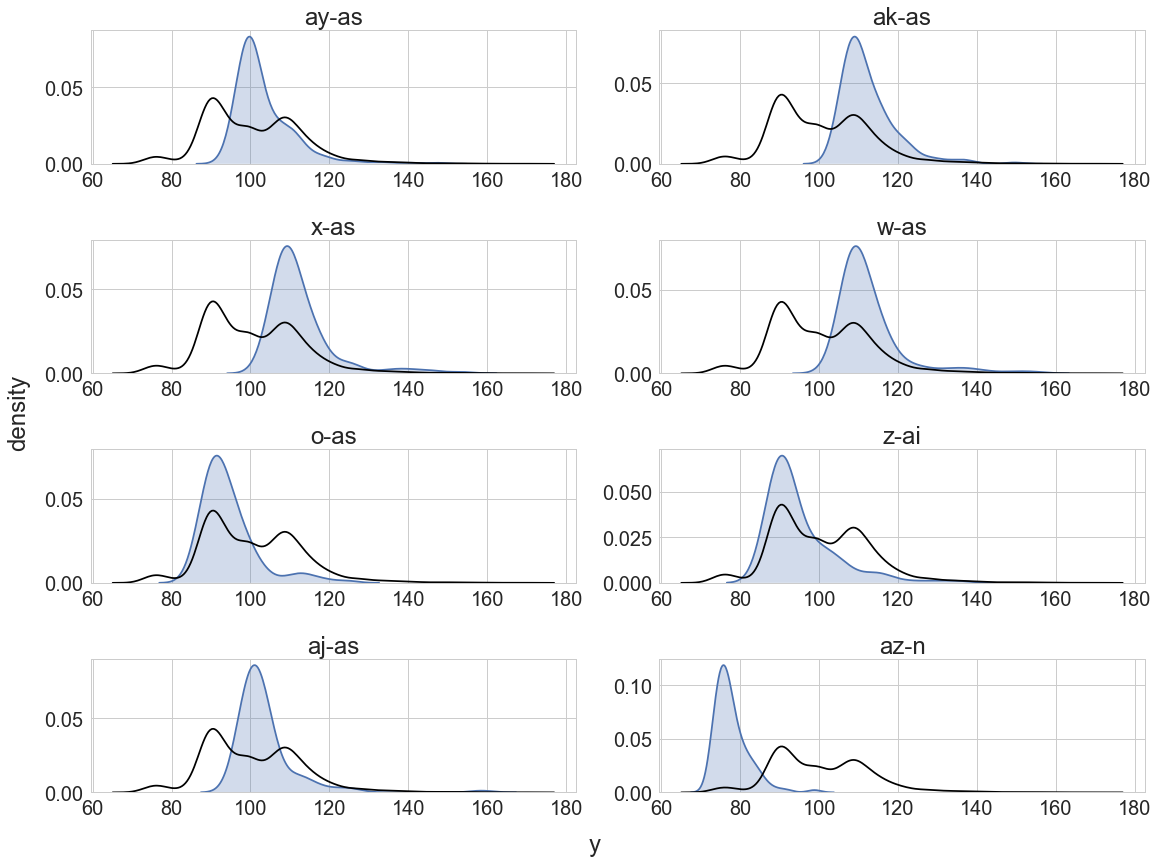

In [495]:
def comb_lvl(comb_cat):
    '''Plotting 8 top combinations of 2 feature levels.'''
    
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(16,12))
    
    for i, feat in enumerate(comb_cat[[comb_cat.columns[0], comb_cat.columns[1]]][:8].values):
        
        sub_plot = fig.add_subplot(4, 2, i + 1)
        
        query_txt = "{} == '{}' & {} == '{}'".format(comb_cat.columns[0], feat[0], comb_cat.columns[1], feat[1])
        sns.kdeplot(train_df.query(query_txt)['y'].values, shade=True, gridsize=250)
        sns.kdeplot(train_df['y'].values, color='k', gridsize=250)

        #sub_plot.set(xlim=(70, 130), ylim=(0, 0.15))
        sub_plot.set_title(comb_cat[comb_cat.columns[-1]][:8].values.flatten()[i])

    fig.tight_layout()
    fig.text(0, 0.5, 'density', ha='center', va='center', rotation='vertical')
    fig.text(0.5, 0, 'y', ha='center', va='center')

    plt.show()

comb_lvl(x)

In [462]:
x = train_df[['X0', 'X1', 'X2', 'y']].query("X0 == 'ak' & X2 == 'as'")
l_s = [x.query("X1 =='l'")['y'].values, x.query("X1 =='s'")['y'].values]
y = train_df[['X0', 'X1', 'X2', 'y']].query("X0 == 'ay' & X2 == 'as'")
aa_i = [y.query("X1 =='aa'")['y'].values, y.query("X1 =='i'")['y'].values]

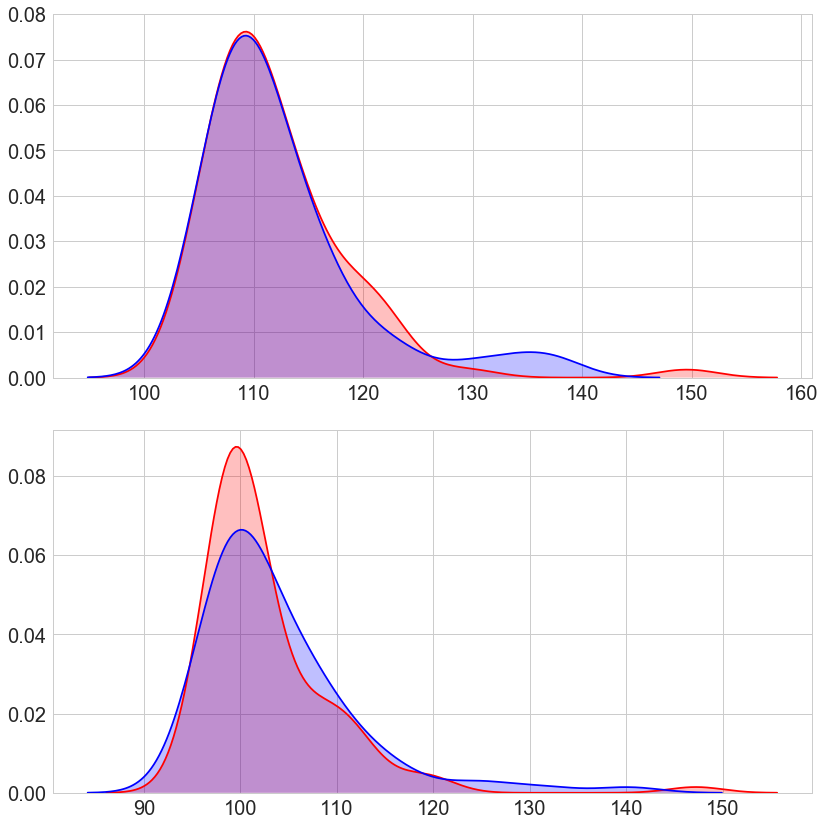

In [475]:
def comb_plot(combinations=[]):
    '''Put a list/tuple of 2 feature levels to compare. Subplotting for more combinations is available.'''
    
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(12,12))

    for i, j in enumerate(combinations):

        sub_plot = fig.add_subplot(len(combinations), 1, i + 1)

        sns.kdeplot(j[0], shade=True, color='red', gridsize=250)
        sns.kdeplot(j[1], shade=True, color='blue', gridsize=250)
        
        #sub_plot.set_title()
        
    fig.tight_layout()

    
    #sub_plot.set(xlim=(70, 130), ylim=(0, 0.15))
    

comb_plot([l_s, aa_i])

## Testing other categorical features combinations

### X0 vs X1

In [497]:
x0_x1 = comb_cat('X0', 'X1')
x0_x1[:8]

X0  X1  count  y_mean  y_std  X0-X1
0   z  aa    156    94.8    7.6   z-aa
1   t   b    151    93.6    8.0    t-b
2   x  aa    122   112.6    7.7   x-aa
3   y  aa    120    93.0    6.5   y-aa
4  ay  aa    119   102.7    6.7  ay-aa
5   t  aa    111    93.2    6.9   t-aa
6   w   s    108   112.9    8.4    w-s
7   z   b    106    96.3    9.4    z-b

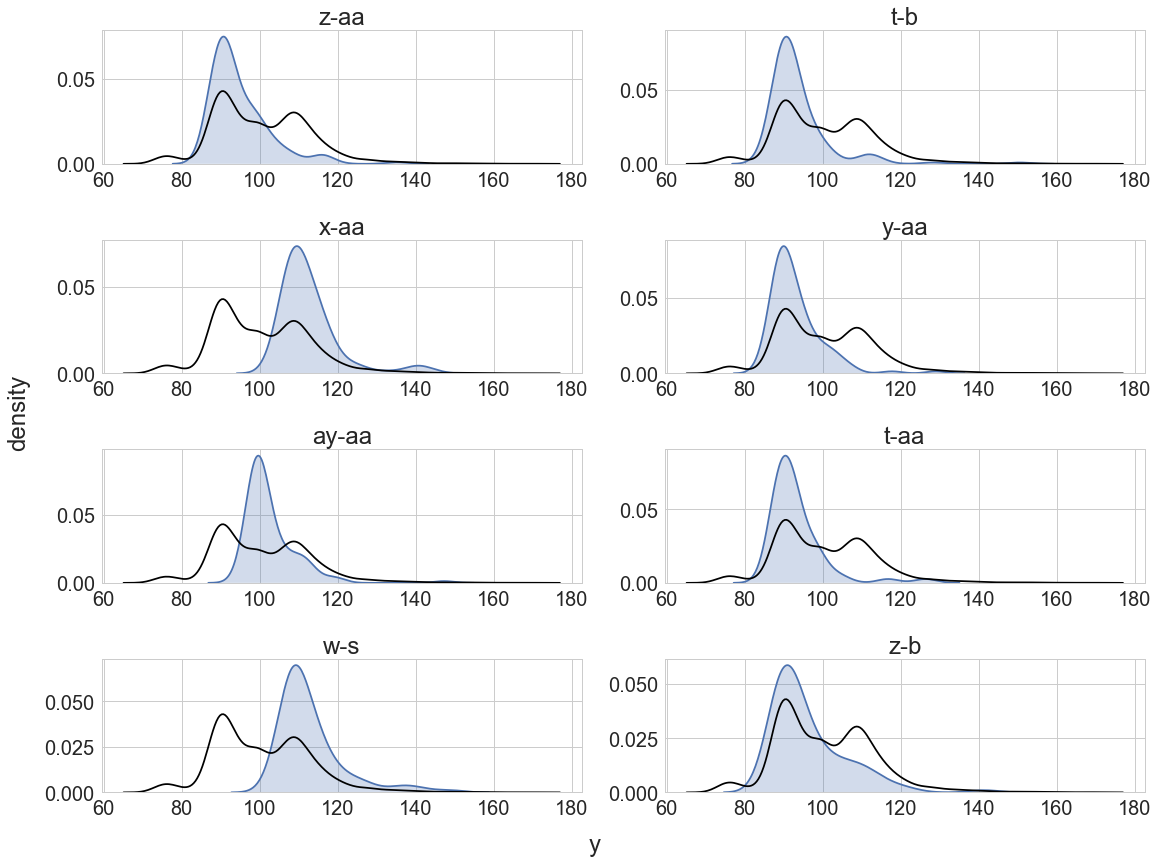

In [498]:
comb_lvl(x0_x1)

### X0 vs X3

In [499]:
x0_x3 = comb_cat('X0', 'X3')
x0_x3[:8]

X0 X3  count  y_mean  y_std X0-X3
0   t  c    203    94.0    8.3   t-c
1   z  c    189    95.1    8.3   z-c
2  ay  c    178   104.1    7.8  ay-c
3   x  c    162   113.7   10.4   x-c
4  az  f    146    78.1    4.8  az-f
5   o  f    135    94.1    6.9   o-f
6  ak  c    134   112.6    7.6  ak-c
7   n  f    133    93.8    8.4   n-f

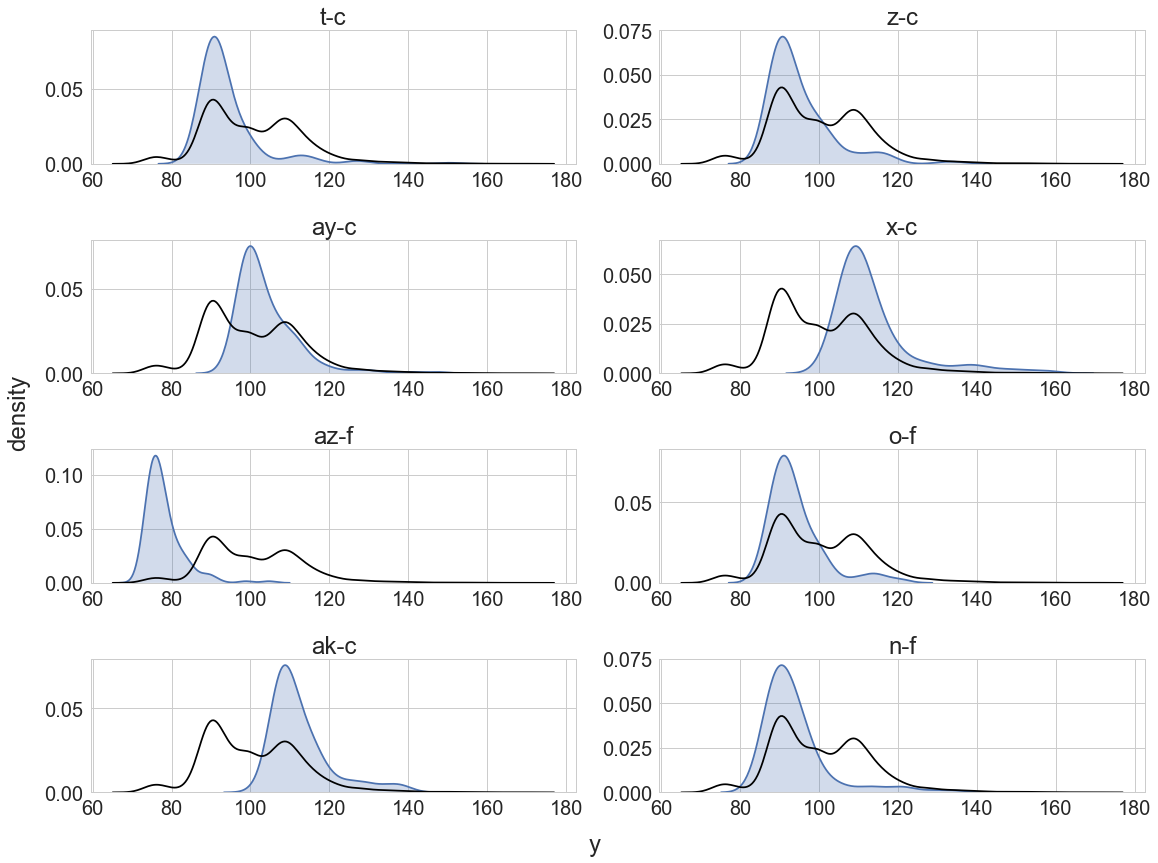

In [514]:
comb_lvl(x0_x3)

### X0 vs X5

In [500]:
x0_x5 = comb_cat('X0', 'X5')
x0_x5[:8]

X0  X5  count  y_mean  y_std  X0-X5
0   z   n     33    99.7   12.4    z-n
1  ay   p     24   104.9   11.6   ay-p
2  ak  ac     24   112.2    8.8  ak-ac
3  ak  ae     23   112.7    8.6  ak-ae
4   y  ag     23    92.3    3.5   y-ag
5   z   v     22    95.3    8.3    z-v
6   x   w     22   109.1    6.4    x-w
7  ay  ae     22   105.1    6.4  ay-ae

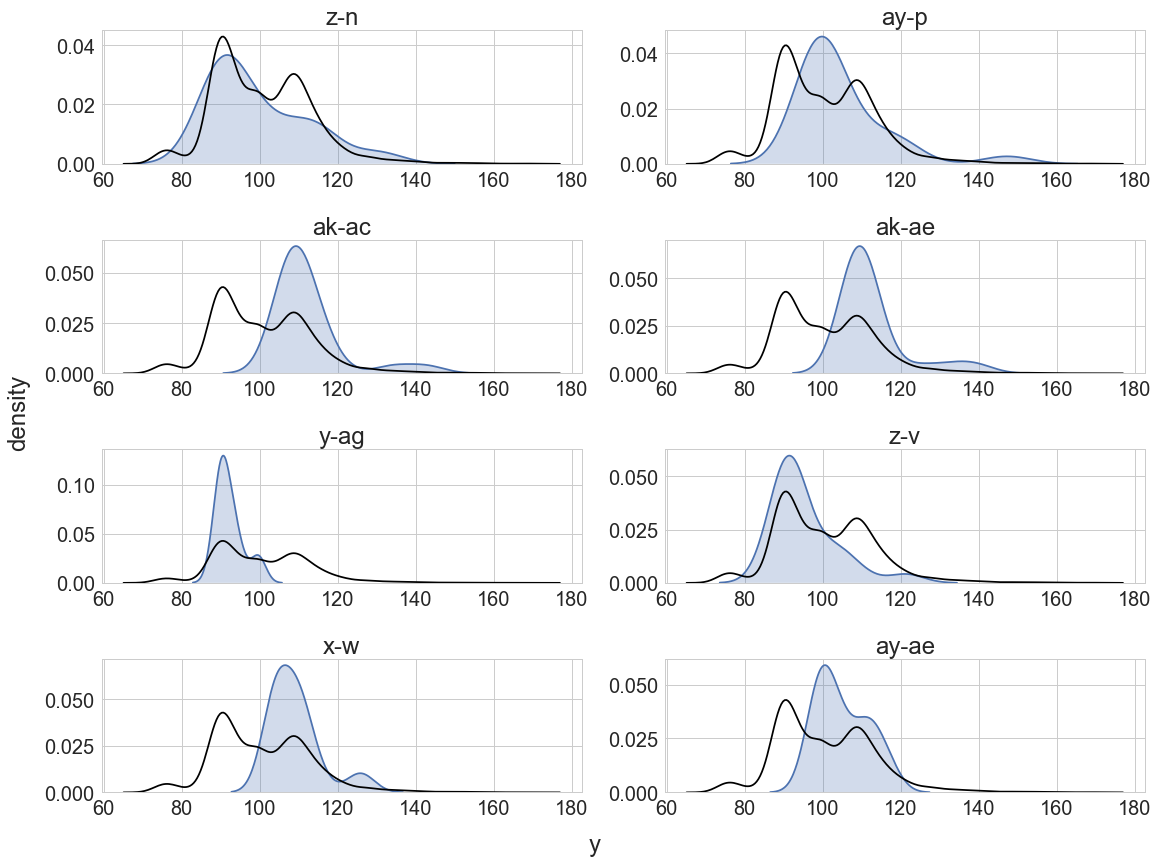

In [515]:
comb_lvl(x0_x5)

### X0 vs X6

In [501]:
x0_x6 = comb_cat('X0', 'X6')
x0_x6[:8]

X0 X6  count  y_mean  y_std X0-X6
0   x  j    119   113.6    9.7   x-j
1  ay  j    116   103.8    8.4  ay-j
2  ak  g    103   113.5    8.2  ak-g
3   z  j    101    95.4    8.7   z-j
4   z  g     91    96.7    9.5   z-g
5  ak  i     85   112.4    7.3  ak-i
6   t  g     84    94.1    7.8   t-g
7   y  j     80    93.3    8.5   y-j

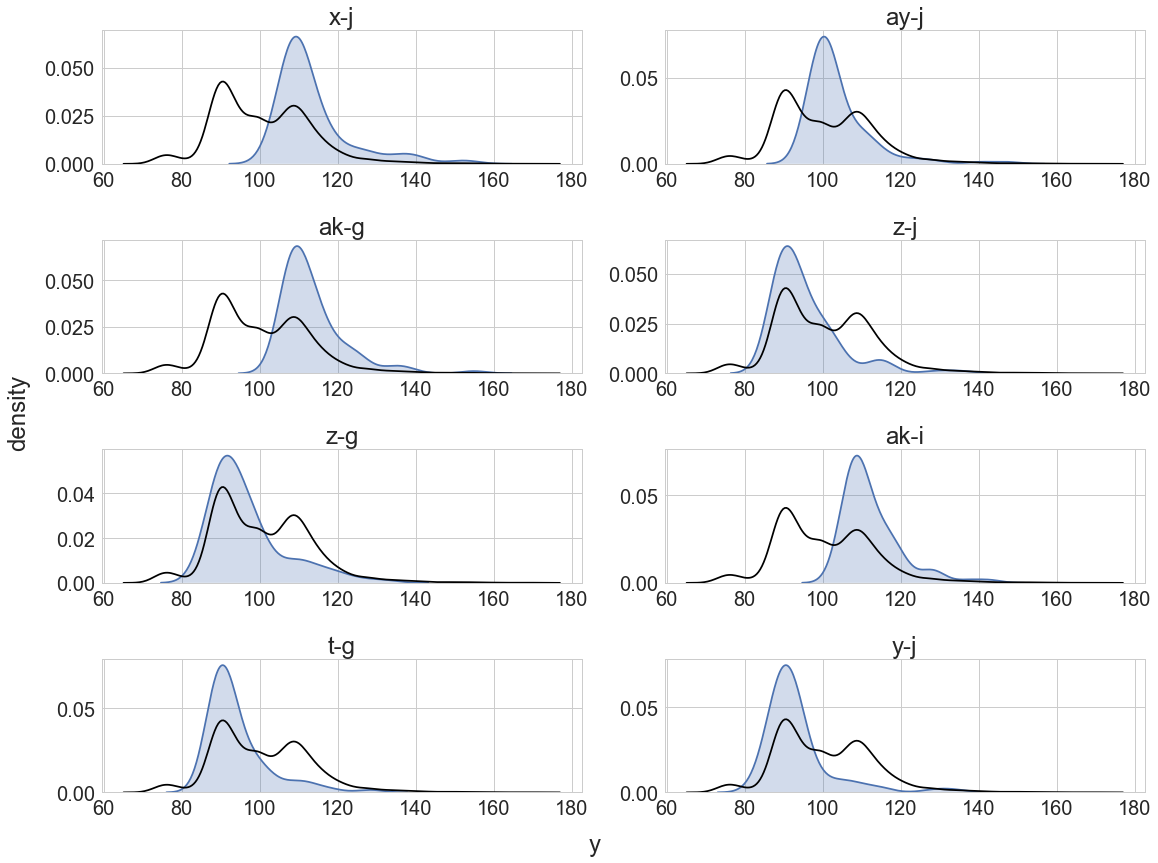

In [516]:
comb_lvl(x0_x6)

### X0 vs X8

In [502]:
x0_x8 = comb_cat('X0', 'X8')
x0_x8[:8]

X0 X8  count  y_mean  y_std X0-X8
0   x  s     75   111.2    8.0   x-s
1   z  j     72    96.5   10.0   z-j
2  ay  k     66   105.0    9.2  ay-k
3  ak  i     65   111.4    6.1  ak-i
4   o  a     57    94.3    6.8   o-a
5  ak  e     54   112.3    6.3  ak-e
6  ap  n     39   116.8    5.4  ap-n
7   o  v     39    95.9    9.4   o-v

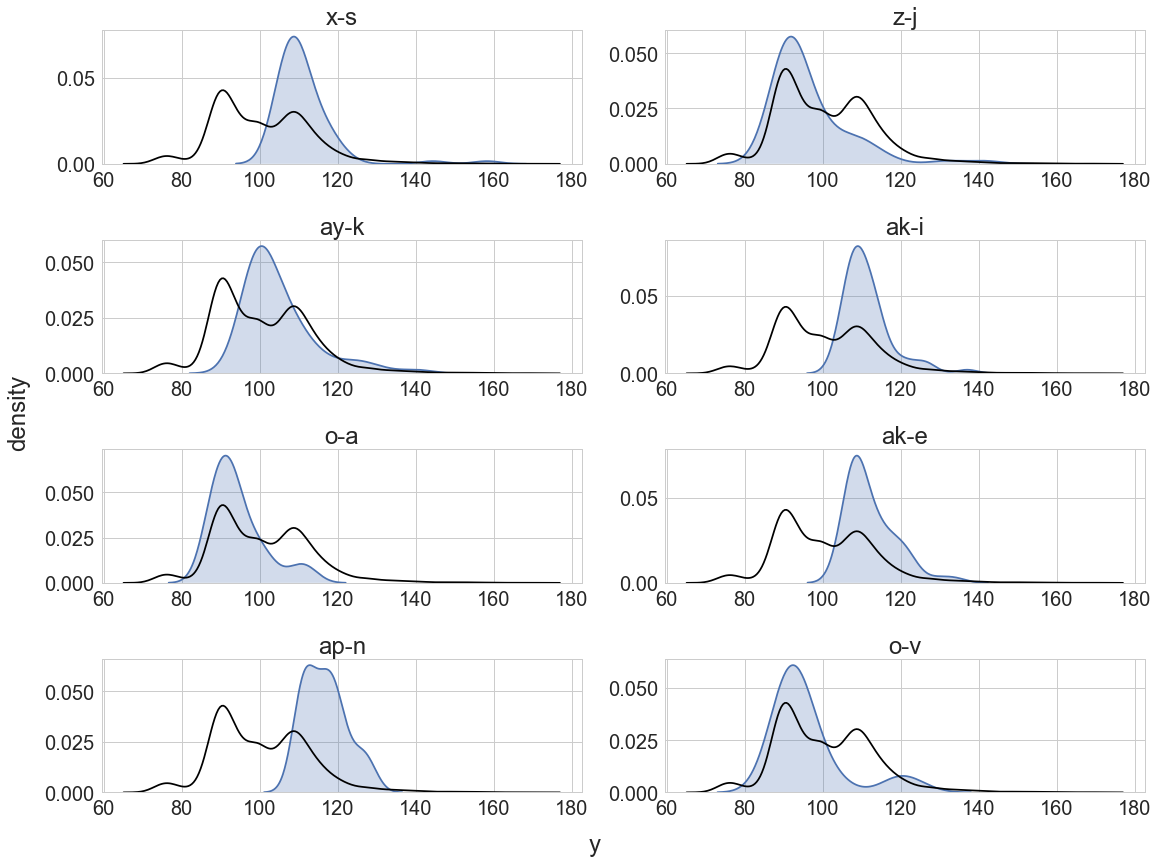

In [517]:
comb_lvl(x0_x8)

### X1 vs X2

In [503]:
x1_x2 = comb_cat('X1', 'X2')
x1_x2[:8]

X1  X2  count  y_mean  y_std  X1-X2
0   s  as    434   104.7   11.7   s-as
1  aa  as    358   103.6   10.1  aa-as
2   l  as    295   101.4   11.0   l-as
3  aa  ai    195    93.9    7.4  aa-ai
4   i  as    172   106.8   10.3   i-as
5   b   m    157    98.7   11.7    b-m
6   l  ae    129    96.1   11.1   l-ae
7   b  ai    126    93.8    9.0   b-ai

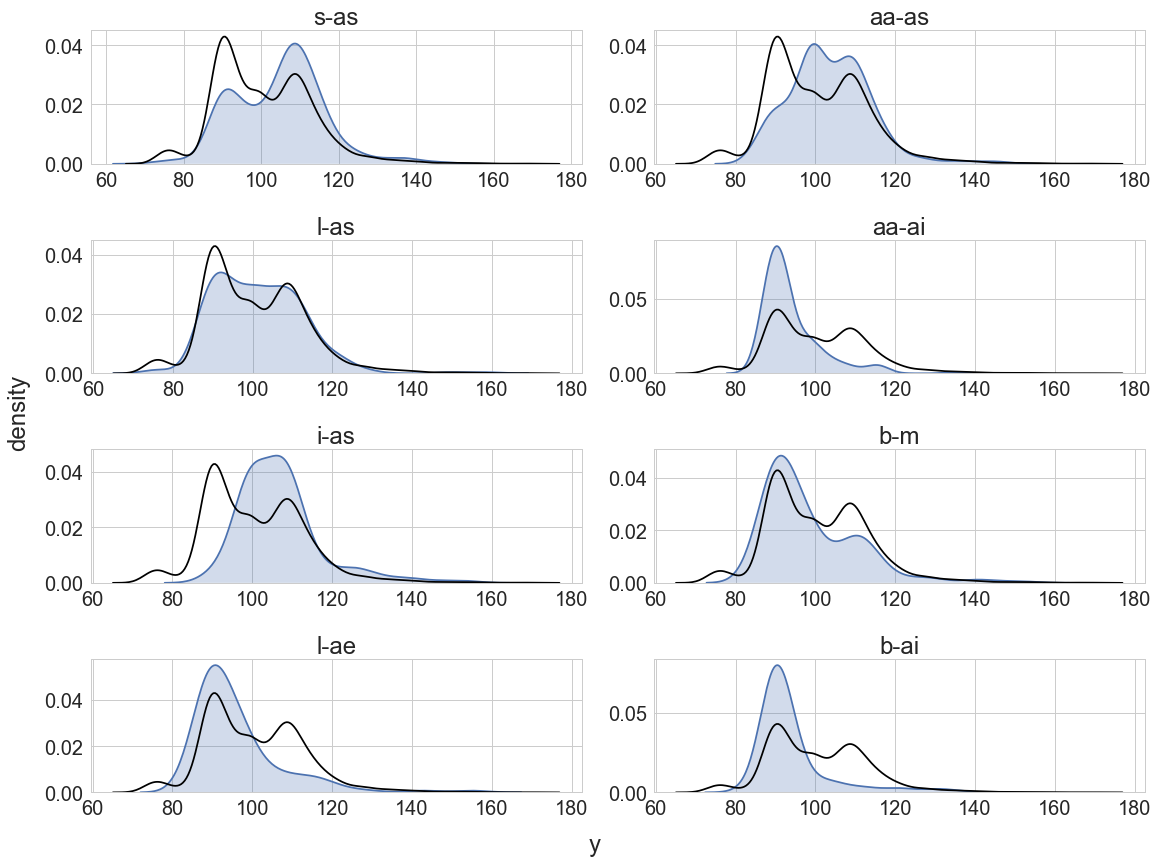

In [518]:
comb_lvl(x1_x2)

### X1 vs X3

In [504]:
x1_x3 = comb_cat('X1', 'X3')
x1_x3[:8]

X1 X3  count  y_mean  y_std X1-X3
0  aa  c    497    99.7   11.1  aa-c
1   l  f    458    98.1   13.1   l-f
2   b  c    393   100.0   11.8   b-c
3   s  c    356   102.2   11.8   s-c
4   r  f    182    98.2   10.4   r-f
5   b  a    170    98.9   11.7   b-a
6   v  c    158   106.2   13.0   v-c
7   i  c    138   105.5   10.4   i-c

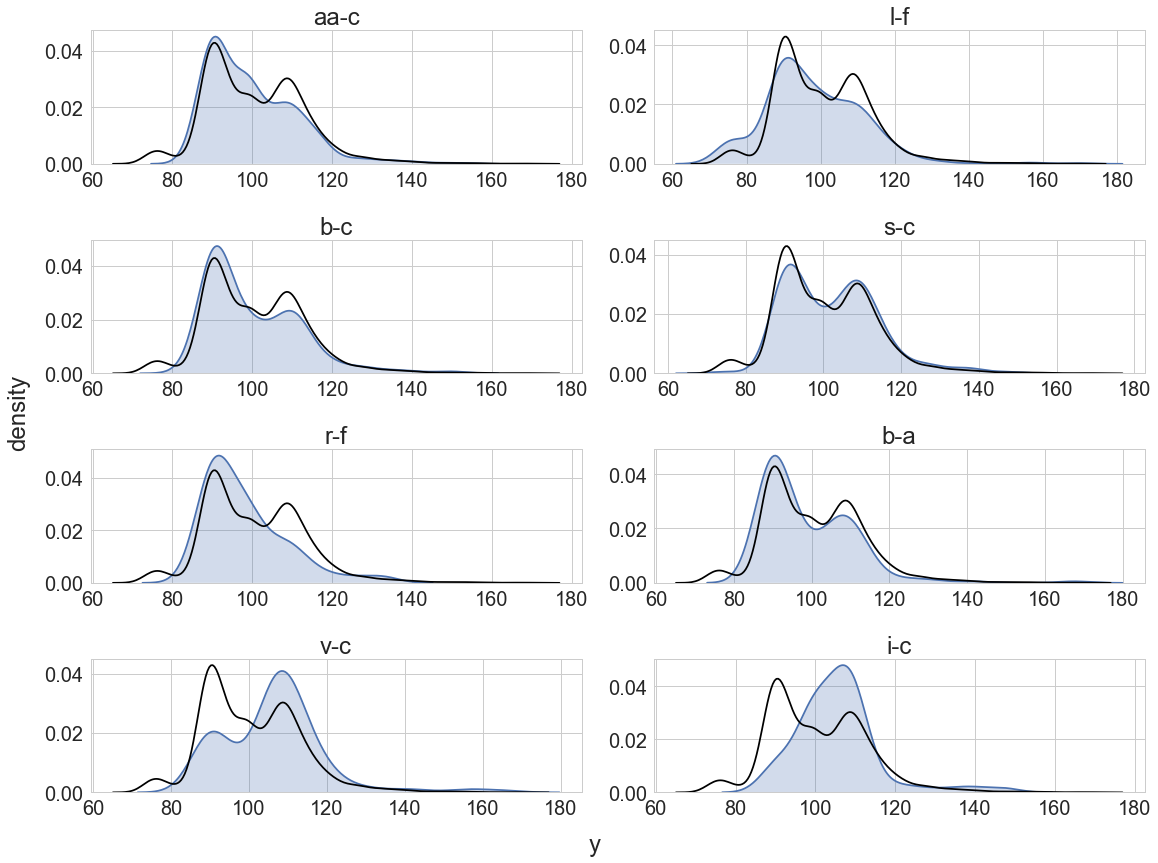

In [519]:
comb_lvl(x1_x3)

### X1 vs X5

In [505]:
x1_x5 = comb_cat('X1', 'X5')
x1_x5[:8]

X1  X5  count  y_mean  y_std  X1-X5
0  aa   d     67   101.1    9.3   aa-d
1  aa  af     59   102.8   10.8  aa-af
2  aa   p     51   100.9   10.7   aa-p
3  aa   k     51    99.0    9.7   aa-k
4  aa  ab     48   101.8   12.9  aa-ab
5  aa   m     48   100.0   11.3   aa-m
6  aa   i     46    98.4    9.2   aa-i
7  aa   n     46   102.1   11.9   aa-n

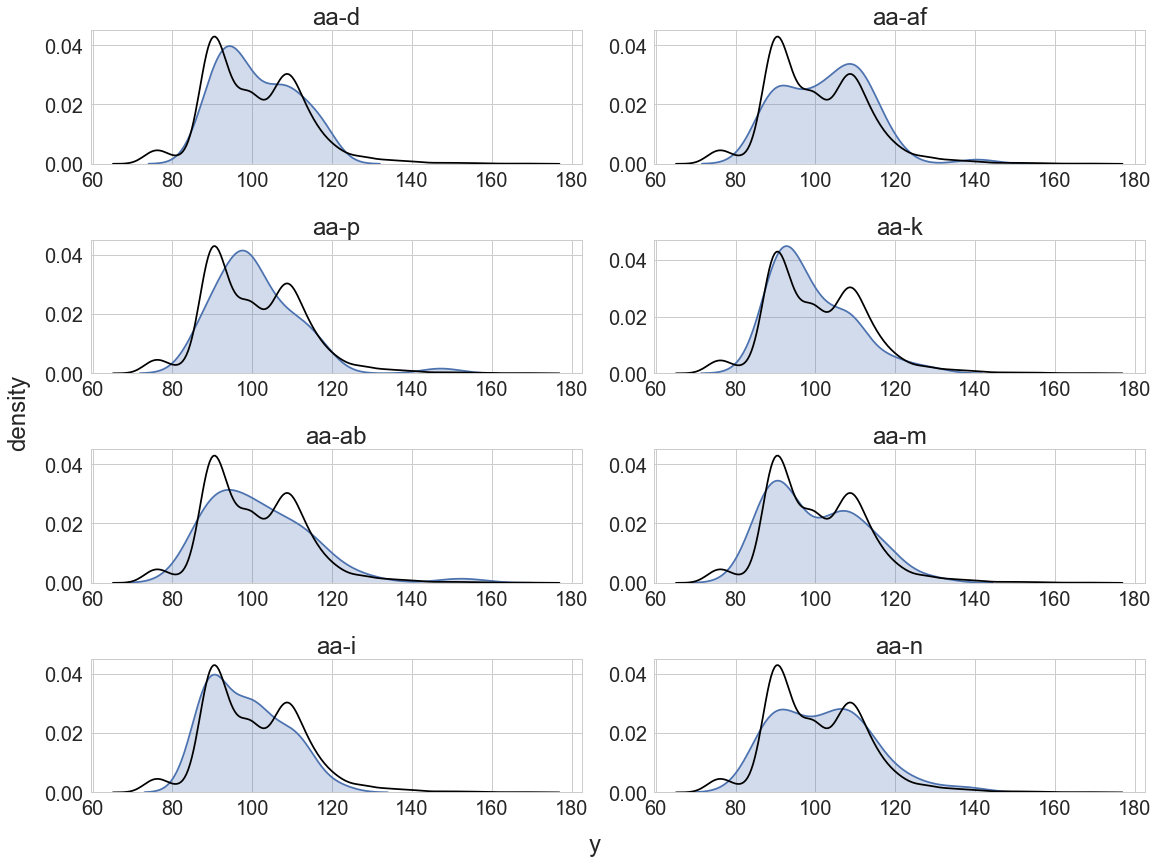

In [520]:
comb_lvl(x1_x5)

### X1 vs X6

In [506]:
x1_x6 = comb_cat('X1', 'X6')
x1_x6[:8]

X1 X6  count  y_mean  y_std X1-X6
0  aa  j    225   100.7   11.6  aa-j
1  aa  g    201    98.6    9.8  aa-g
2   l  g    194    97.5   13.7   l-g
3   b  j    185   101.2   12.0   b-j
4   s  g    173   102.8   12.6   s-g
5  aa  d    145   102.7    9.7  aa-d
6   s  j    135   101.3   12.6   s-j
7   v  g    127   104.3   14.6   v-g

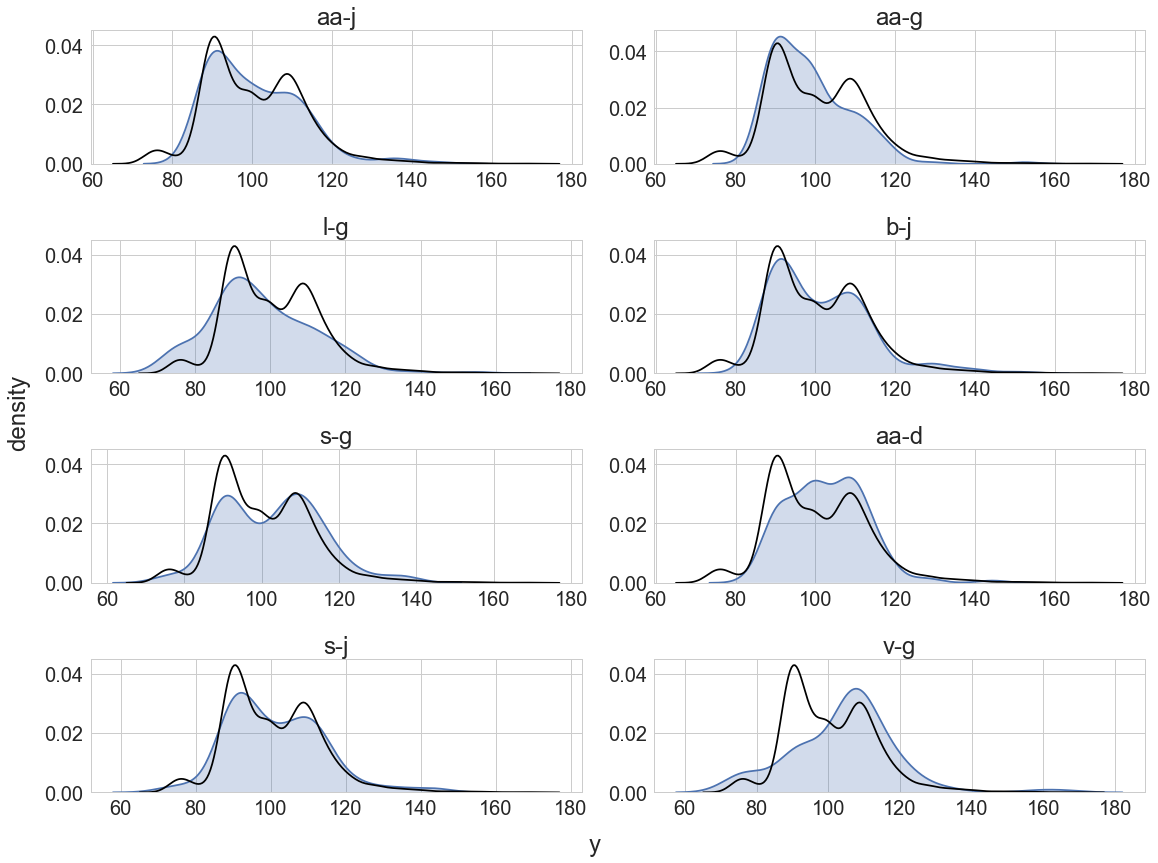

In [521]:
comb_lvl(x1_x6)

### X1 vs X8

In [507]:
x1_x8 = comb_cat('X1', 'X8')
x1_x8[:8]

X1 X8  count  y_mean  y_std X1-X8
0  aa  s    102   104.3   11.0  aa-s
1   b  j     77   101.6   12.8   b-j
2   l  n     65   110.1   10.6   l-n
3  aa  f     62    98.0   11.7  aa-f
4  aa  o     62    98.2    9.9  aa-o
5  aa  b     62    98.7    9.1  aa-b
6   s  v     61    98.0   10.0   s-v
7   i  k     60   104.6    8.9   i-k

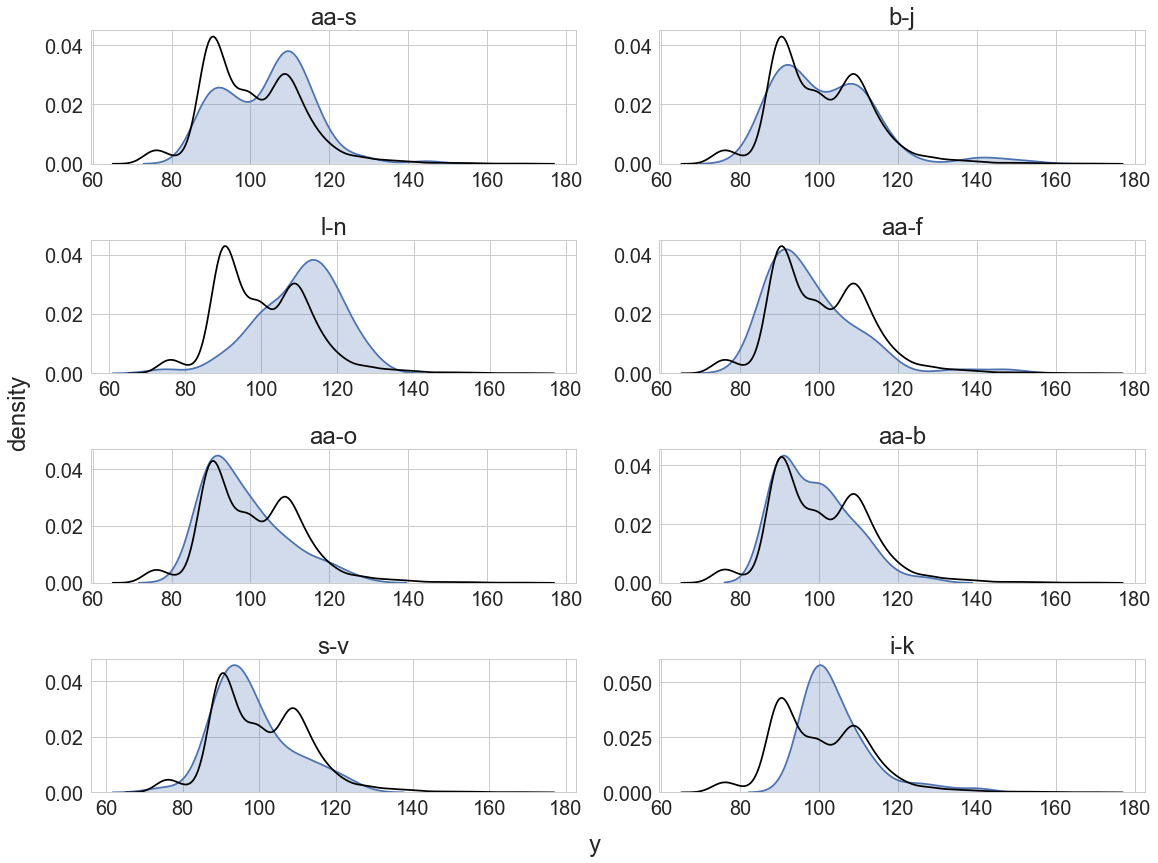

In [522]:
comb_lvl(x1_x8)

### X3 vs X5

In [508]:
x3_x5 = comb_cat('X3', 'X5')
x3_x5[:8]

X3  X5  count  y_mean  y_std X3-X5
0  c   n    136   104.5   14.5   c-n
1  c  ae    120   101.7   12.0  c-ae
2  c   q    118   102.7   13.6   c-q
3  c   k    114   101.4   10.2   c-k
4  c  ag    104   102.6   12.8  c-ag
5  c   p    103   102.4   12.7   c-p
6  c   i     97   100.7   13.2   c-i
7  c   d     97   100.6   11.8   c-d

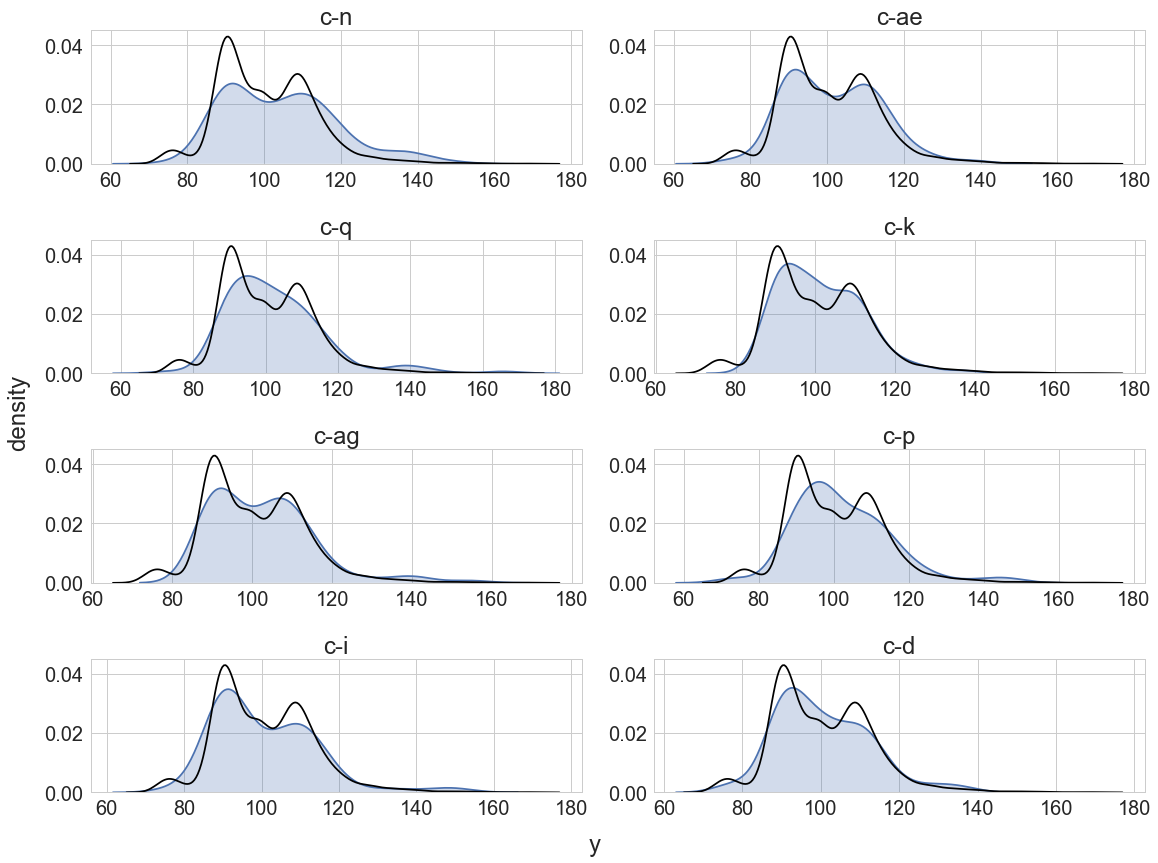

In [523]:
comb_lvl(x3_x5)

### X3 vs X6

In [509]:
x3_x6 = comb_cat('X3', 'X6')
x3_x6[:8]

X3 X6  count  y_mean  y_std X3-X6
0  c  j    542   102.4   13.2   c-j
1  c  g    467   101.3   12.1   c-g
2  f  g    300    96.5   13.9   f-g
3  c  d    298   102.2   11.6   c-d
4  c  l    200   101.3   10.9   c-l
5  c  i    182   102.1   12.7   c-i
6  f  j    176    95.2   13.2   f-j
7  f  i    171   100.1   12.1   f-i

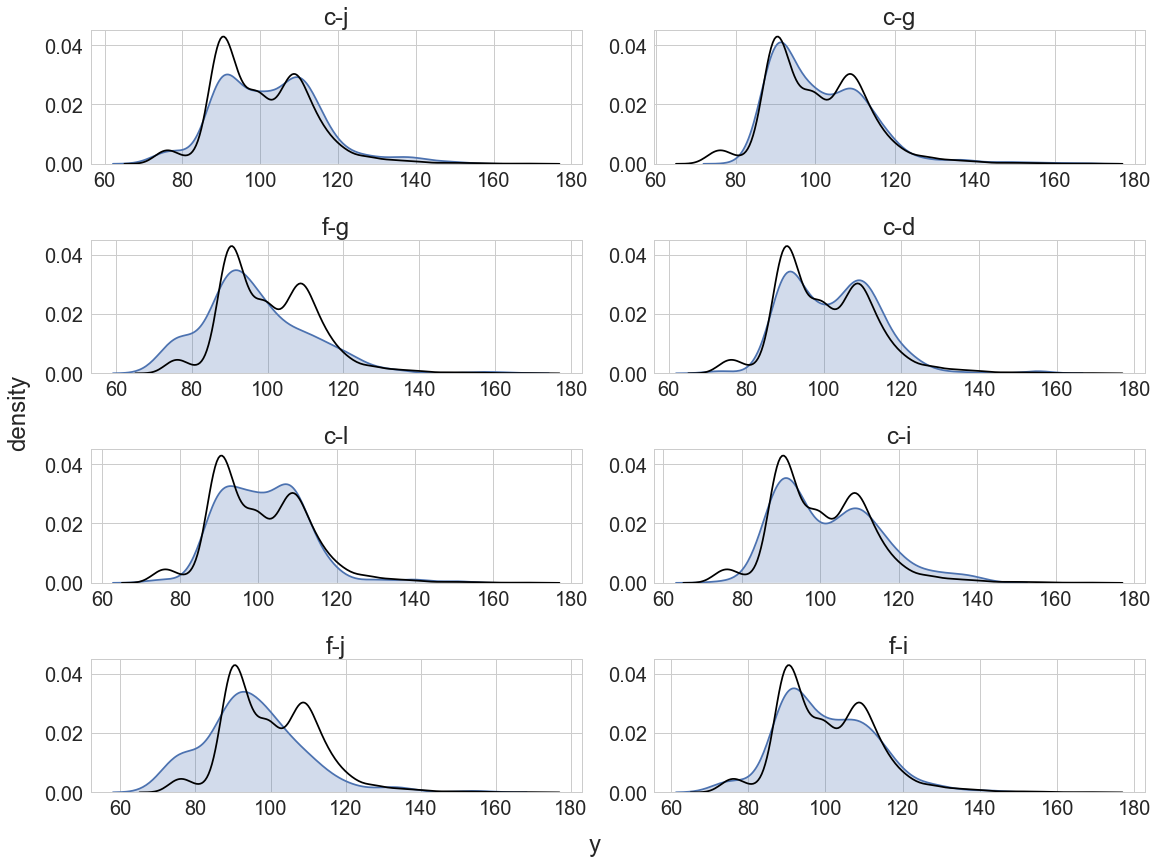

In [524]:
comb_lvl(x3_x6)

### X3 vs X8

In [510]:
x3_x8 = comb_cat('X3', 'X8')
x3_x8[:8]

X3 X8  count  y_mean  y_std X3-X8
0  c  n    145   105.8   12.3   c-n
1  c  j    134   101.4   12.0   c-j
2  c  r    117   104.0   12.1   c-r
3  c  i    108   101.6   11.0   c-i
4  c  b    105    99.4   10.4   c-b
5  c  v    105   101.0   11.2   c-v
6  c  w    104   101.1   13.2   c-w
7  c  e    104   104.7   11.2   c-e

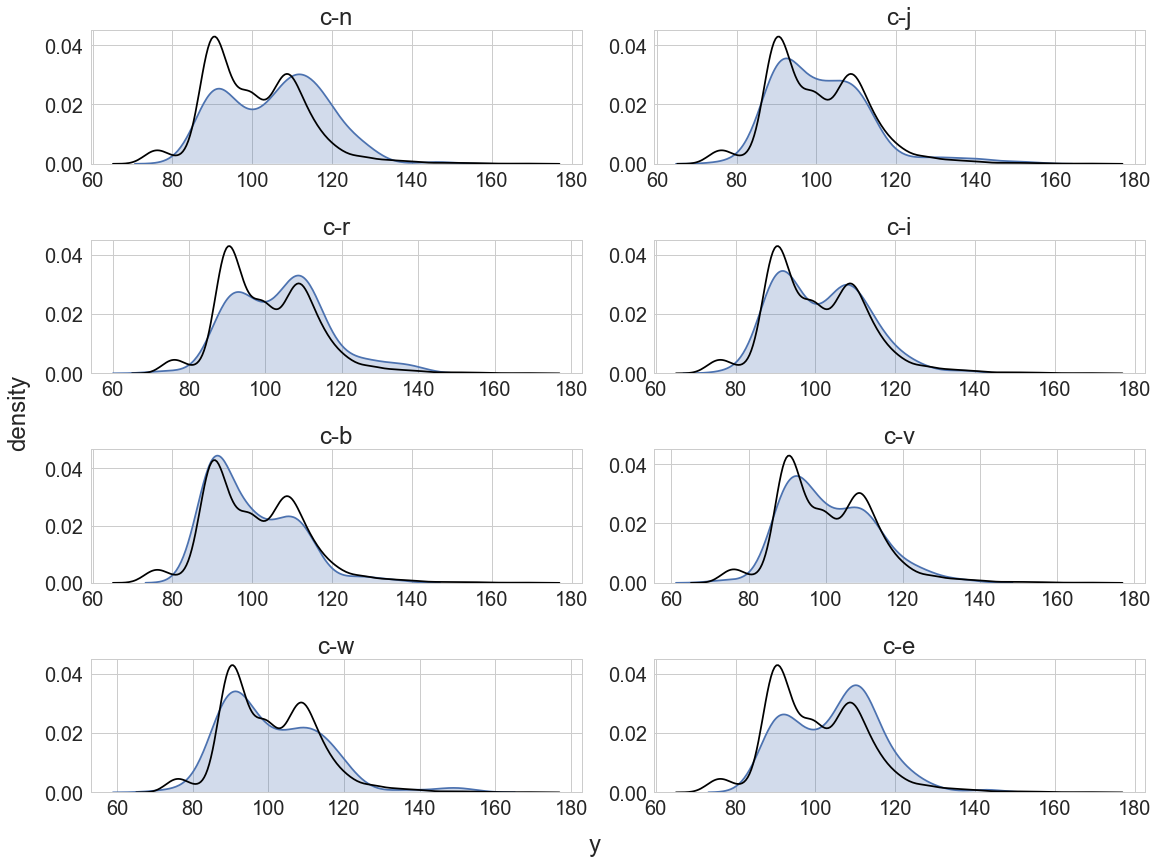

In [525]:
comb_lvl(x3_x8)

### X5 vs X6

In [511]:
x5_x6 = comb_cat('X5', 'X6')
x5_x6[:8]

X5 X6  count  y_mean  y_std X5-X6
0   w  g     63    96.7   11.6   w-g
1   d  g     62   100.9   11.7   d-g
2   d  j     60    99.9   12.3   d-j
3   p  j     60   102.4   15.0   p-j
4  ac  j     60   100.1   13.8  ac-j
5   w  j     60   100.6   11.7   w-j
6   n  j     58   105.2   15.0   n-j
7  ag  g     57   100.4   11.5  ag-g

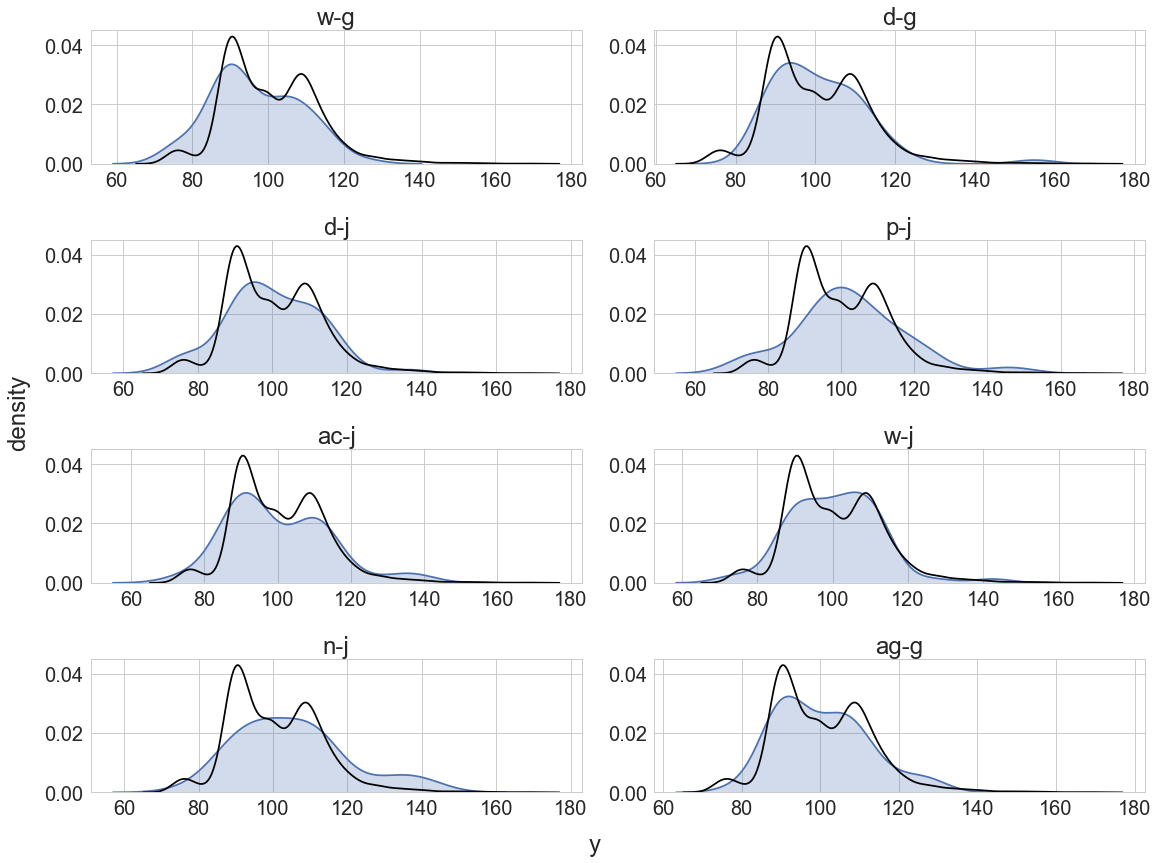

In [526]:
comb_lvl(x5_x6)

### X5 vs X8

In [512]:
x5_x8 = comb_cat('X5', 'X8')
x5_x8[:8]

X5 X8  count  y_mean  y_std X5-X8
0  v  j     25   101.2    9.4   v-j
1  i  w     22    98.9   12.8   i-w
2  n  f     21   100.3   15.2   n-f
3  q  e     20   103.5   12.0   q-e
4  w  r     19   102.1   12.8   w-r
5  p  e     18   104.3   10.2   p-e
6  s  w     18    98.0   10.8   s-w
7  q  r     17   104.1   15.8   q-r

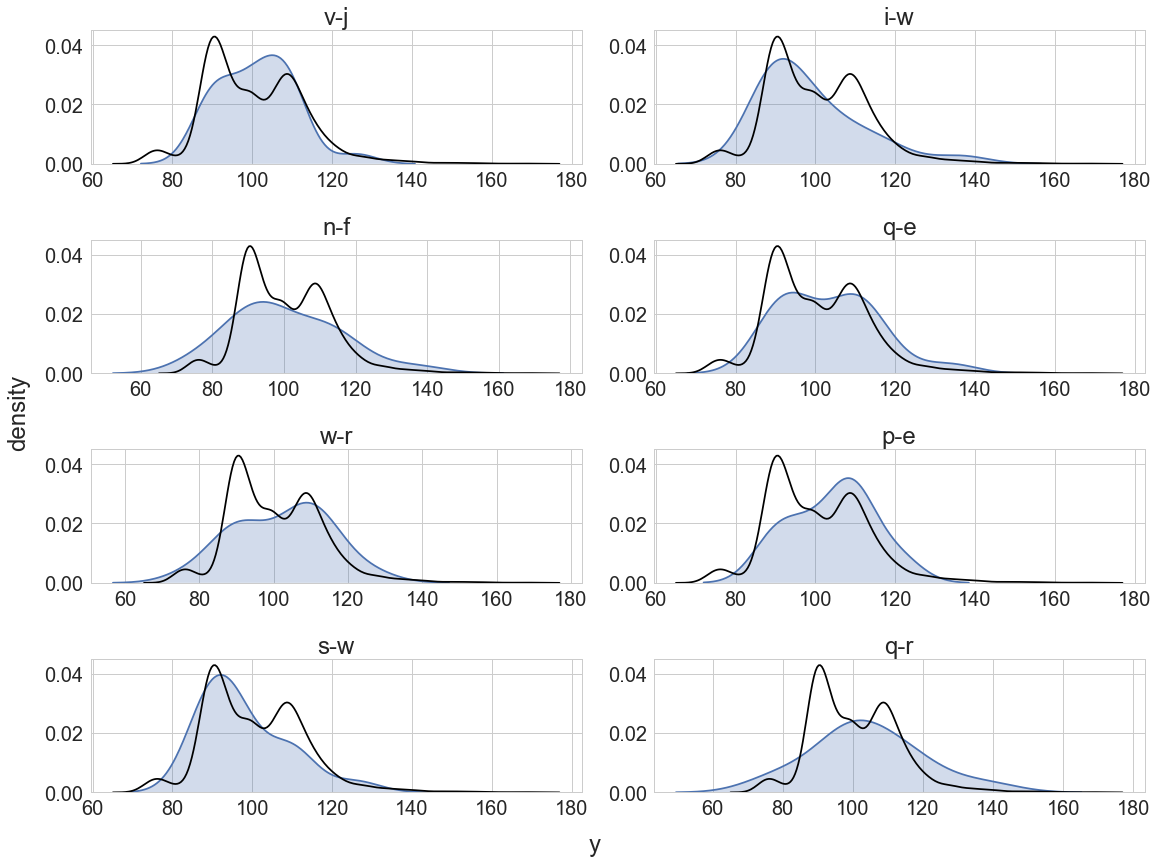

In [527]:
comb_lvl(x5_x8)

### X6 vs X8

In [513]:
x6_x8 = comb_cat('X6', 'X8')
x6_x8[:8]

X6 X8  count  y_mean  y_std X6-X8
0  j  j     90   101.8   12.6   j-j
1  g  s     80    98.7   14.8   g-s
2  g  i     72   102.5   11.9   g-i
3  g  f     70    96.7   12.9   g-f
4  j  n     70   105.0   13.3   j-n
5  g  a     65   100.8   13.3   g-a
6  j  r     58   107.5   16.9   j-r
7  g  o     58    98.3    9.1   g-o

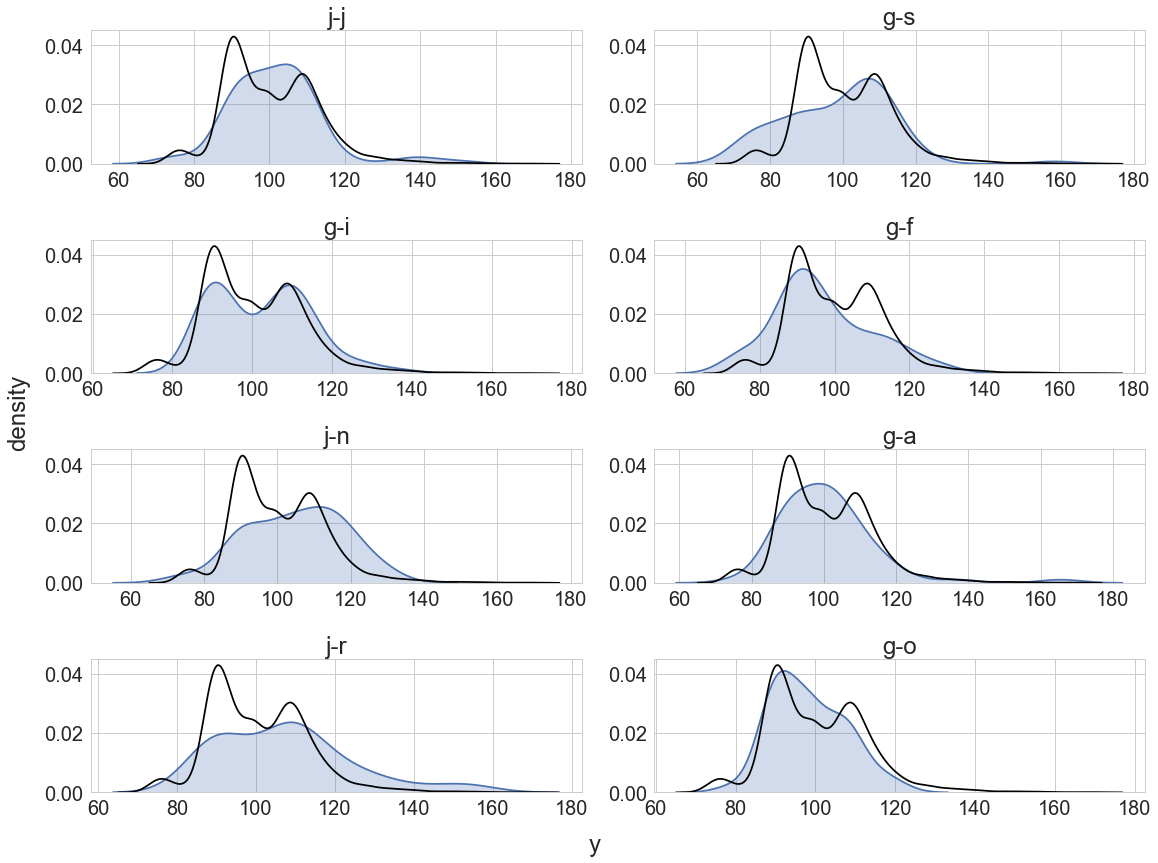

In [528]:
comb_lvl(x6_x8)

## Identifying feature combinations with the highest percentage of outliers